# 강남 3구는 안전한가?

* 강남3구의 주민들이 자신들이 거주하는 구의 체감 안전도를 높게 생각한다는 기사를 확인해 보도록 한다

# 데이터 정리하기

* 필요한 모듈을 import한다.

In [1]:
import numpy as np
import pandas as pd

* 받은 데이터(csv) 파일을 읽는다, 콤마(,)로 천단위가 구분되어 있고
* 한글 인코딩은 **euc-kr** 임

In [2]:
# TODO
crime_anal_police = pd.read_csv('../data/crime_in_Seoul.csv', thousands=',', encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


* 구글 맵스를 사용해서 경찰서의 위치(위도, 경도) 정보를 받아온다

In [3]:
# TODO
import googlemaps

In [4]:
 # 자신의 key를 사용합니다.
gmaps_key = "..."
# TODO
gmaps = googlemaps.Client(key=gmaps_key) 

In [5]:
# TODO
gmaps.geocode('서울중부경찰서', language='ko') 

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [6]:
# 구글 맵을 사용하여 '서울 중부 경찰서' 단어 검색 결과 분석
# 위의 결과를 보면 formatted_address 는 주소
# lat 에는 위도, lng 에는 경도 정보 제공

In [6]:
station_name = [ ]

for name in crime_anal_police['관서명']:
    station_name.append('서울' + str(name[:-1]) + '경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [ ]:
station_addreess = ['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 회현동 한강대로 410',
 '대한민국 서울특별시 서대문구 충현동 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 618-1',
 '대한민국 서울특별시 영등포구 문래동3가 경인로 759',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진1동 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 대조동 통일로 757',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 금천구 시흥동 190',
 '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 양천구 신월동 화곡로 73',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배본동 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

station_lat =  [37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718529,
 37.5387099,
 37.5897482,
 37.58506149999999,
 37.550814,
 37.5135203,
 37.5617309,
 37.5130866,
 37.542873,
 37.6128611,
 37.63730390000001,
 37.4568722,
 37.618692,
 37.5094352,
 37.4743789,
 37.5397827,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6423605,
 37.4945959,
 37.6283597,
 37.6533589,
 37.49349]

station_lng = [126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9989143,
 126.9659183,
 127.0161353,
 127.0457679,
 126.954028,
 126.8976364,
 127.0363806,
 126.9428498,
 127.083821,
 126.9274951,
 127.0273399,
 126.8970429,
 127.1047136,
 127.0669578,
 126.9509748,
 126.8299968,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0714027,
 126.9831279,
 126.9287226,
 127.052682,
 127.0772119] 

In [7]:
# 가져온 주소 및 위도, 경도 등을 저장할 리스트들을 생성
# 빈 리스트
station_addreess = [ ]
station_lat = [ ]
station_lng = [ ]

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_addreess.append(tmp[0].get("formatted_address"))
    
    tmp_loc = tmp[0].get("geometry")

    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    
    print(name + '-->' + tmp[0].get("formatted_address"))

서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동5가 301
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 마포대로 183
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 신사2동 184-56
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50
서울중랑경찰서-->대한민국 서울특별시 중랑구 망우동 489-7
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 998
서울관악경찰서-->대한민국 서울특별시 관악구 봉천동
서울강서경찰서-->대한민국 서울특별시 강서구 화곡6동 980-15
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 구로동 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 가락본동 9
서울노원경찰서-->대한민국 서울특별시 

In [8]:
station_addreess

['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 회현동 한강대로 410',
 '대한민국 서울특별시 서대문구 충현동 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 마포대로 183',
 '대한민국 서울특별시 영등포구 영등포동1가 618-7',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진1동 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 신사2동 184-56',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50',
 '대한민국 서울특별시 중랑구 망우동 489-7',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 강서구 화곡6동 980-15',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 구로동 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배본동 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

In [9]:
# 위도
station_lat

[37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718529,
 37.5387099,
 37.5897482,
 37.58506149999999,
 37.550814,
 37.5153176,
 37.5617309,
 37.5130866,
 37.542873,
 37.591836,
 37.63730390000001,
 37.4568722,
 37.5990885,
 37.5094352,
 37.4743789,
 37.5516732,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6425238,
 37.4945959,
 37.6283597,
 37.6533589,
 37.49349]

In [10]:
# 경도
station_lng

[126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9989143,
 126.9659183,
 127.0161353,
 127.0457679,
 126.954028,
 126.905728,
 127.0363806,
 126.9428498,
 127.083821,
 126.9053648,
 127.0273399,
 126.8970429,
 127.0956516,
 127.0669578,
 126.9509748,
 126.8499269,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0717076,
 126.9831279,
 126.9287226,
 127.052682,
 127.0772119]

In [11]:
gu_name = []

for name in station_addreess:
    tmp = name.split()
    
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    
    gu_name.append(tmp_gu)
    
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [12]:
# 금천경찰서의 경우 관악구에 위치해 있어서 금천서는 예외 처리 해야 함
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [13]:
# 금천서를 찾아서 관악구로 되어 있는 것을 금천구로 변경
crime_anal_police.loc[crime_anal_police['관서명']=='금천서', ['구별']] = '금천구'
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [14]:
# TODO
crime_anal_police.to_csv('../data/crime_in_Seoul_include_gu_name.csv', sep=',', encoding='utf8') 

In [13]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


# 범죄 데이터 구별로 정리하기

In [15]:
crime_anal_raw = pd.read_csv('../data/crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [16]:
crime_anal_raw = pd.read_csv('../data/crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8', index_col=0)

# TODO
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [17]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [18]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [20]:
### 머신러닝 부분
# 강도나 살인등은 두자리수 인데 절도와 폭력등은 네 자리수
# 숫자 그 자체로도 중요하지만, 각각을 비슷한 범위에 놓고 계산을 하거나 비교를 하는 것이 편리
# 각 항목의 최댓값을 1로 두면 추후 범죄 발생 건수를 종합적으로 비교할 때 편리
# '강간', '강도', '살인', '절도', '폭력' 에 대해서 각 컬럼별로 정규화

from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [21]:
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [39]:
result_CCTV = pd.read_csv('../data/CCTV_result.csv', encoding='UTF-8', 
                          index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,4.857843,369.707384,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,1.286607,370.084431,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,1.641616,406.943540,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,2.333944,417.767372,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,2.860342,368.622261,525515.0,1496


In [40]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,4.857843,369.707384,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,1.286607,370.084431,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,1.641616,406.943540,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,2.333944,417.767372,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,2.860342,368.622261,525515.0,1496


In [41]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,4.857843,369.707384,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,1.286607,370.084431,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,1.641616,406.943540,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,2.333944,417.767372,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,2.860342,368.622261,525515.0,1496


In [42]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,4.857843,369.707384,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,1.286607,370.084431,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,1.641616,406.943540,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,2.333944,417.767372,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,2.860342,368.622261,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,2.204979,416.915211,372164.0,707
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,2.603930,325.647079,447874.0,1561
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,0.666924,423.928929,255082.0,1015
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,1.905445,383.477292,569384.0,1265


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualization using seaborn

In [44]:
import platform

path = "c:/fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [45]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,4.857843,369.707384,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,1.286607,370.084431,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,1.641616,406.943540,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,2.333944,417.767372,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,2.860342,368.622261,525515.0,1496


C:\Users\student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


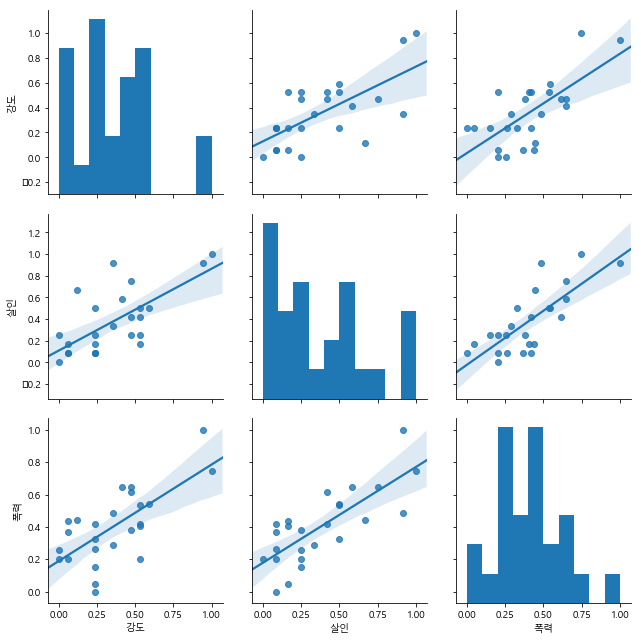

In [46]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], kind='reg', size=3)
plt.show()

In [47]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,4.857843,369.707384,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,1.286607,370.084431,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,1.641616,406.943540,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,2.333944,417.767372,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,2.860342,368.622261,525515.0,1496


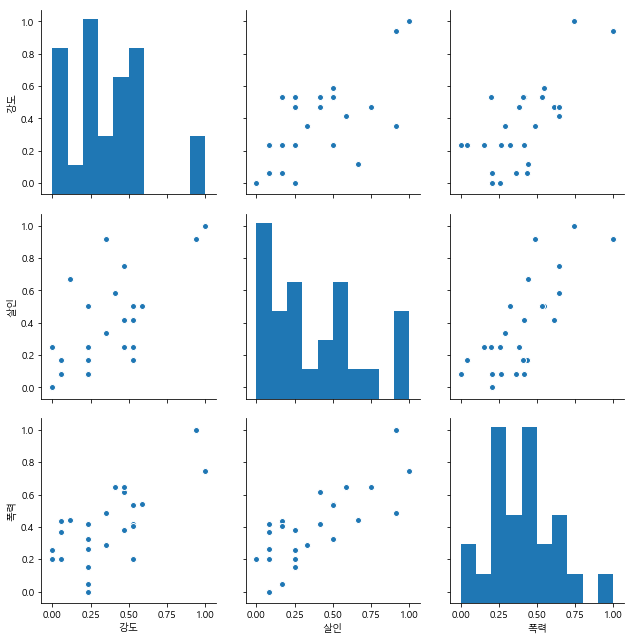

In [48]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], kind='scatter',  size=3)
plt.show()

C:\Users\student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


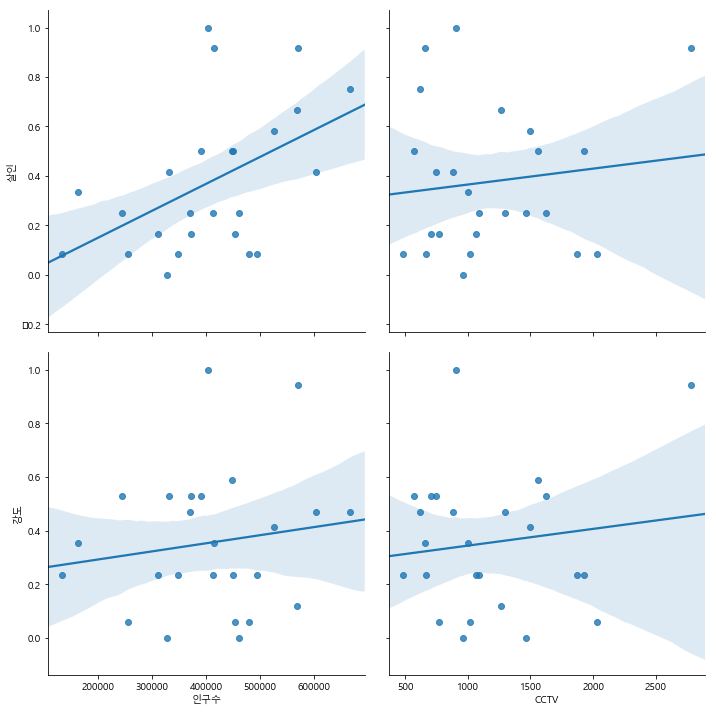

In [49]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인", "강도"], kind='reg', size=5)
plt.show()

C:\Users\student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


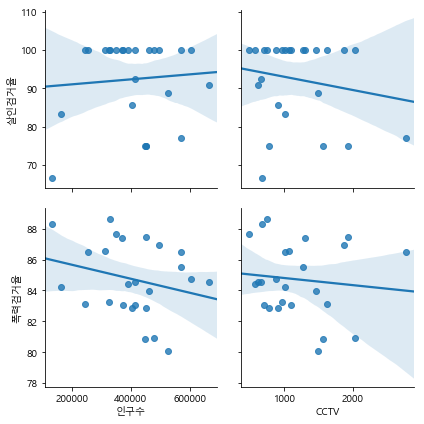

In [50]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인검거율", "폭력검거율"], kind='reg', size=3)
plt.show()

C:\Users\student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


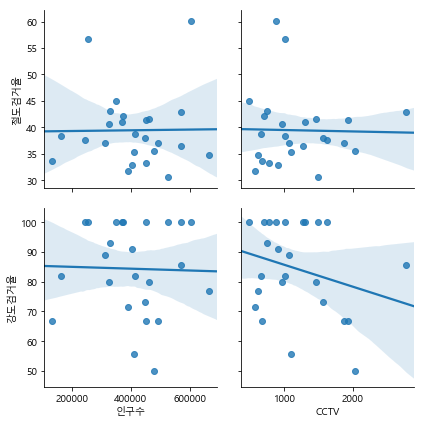

In [51]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["절도검거율", "강도검거율"], kind='reg', size=3)
plt.show()

In [52]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,4.857843,369.707384,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,1.286607,370.084431,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,1.641616,406.943540,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,2.333944,417.767372,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,2.860342,368.622261,525515.0,1496


In [55]:
tmp_max = crime_anal_norm['검거'].max()
tmp_max

100.0

In [56]:
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm['검거']

구별
강남구      85.463066
강동구      85.550226
강북구      94.070728
강서구      96.572809
관악구      85.212224
광진구      96.375820
구로구      75.277906
금천구      97.997139
노원구      88.646174
도봉구     100.000000
동대문구     95.444250
동작구      74.633368
마포구      85.925381
서대문구     88.875144
서초구      77.181692
성동구      94.088810
성북구      89.727243
송파구      85.103066
양천구      81.823827
영등포구     81.958753
용산구      94.776790
은평구      86.842386
종로구      84.141835
중구       74.122650
중랑구      87.066663
Name: 검거, dtype: float64

In [57]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', 
                                                   ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,0.318627,100.000000,348646.0,485
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,0.666924,97.997139,255082.0,1015
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,2.333944,96.572809,603772.0,884
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,2.204979,96.375820,372164.0,707
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,1.633921,95.444250,369496.0,1294


In [58]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
#TODO
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,0.318627,100.000000,348646.0,485
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,0.666924,97.997139,255082.0,1015
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,2.333944,96.572809,603772.0,884
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,2.204979,96.375820,372164.0,707
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,1.633921,95.444250,369496.0,1294


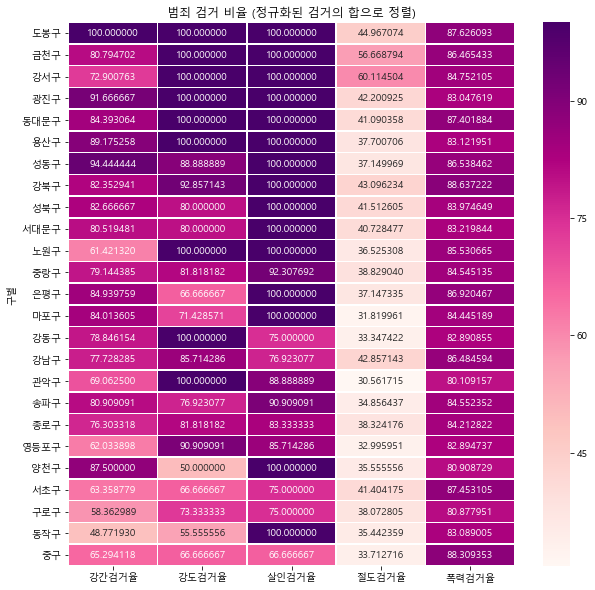

In [59]:
plt.figure(figsize = (10,10))
#sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
sns.heatmap(crime_anal_norm_sort[target_col], 
            annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

In [63]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm['범죄'].head()

구별
강남구    0.971569
강동구    0.257321
강북구    0.328323
강서구    0.466789
관악구    0.572068
Name: 범죄, dtype: float64

In [64]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', 
                                                   ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,0.971569,85.463066,570500.0,2780
영등포구,0.556196,1.000000,1.000000,0.682095,0.745442,62.033898,90.909091,85.714286,32.995951,82.894737,0.796747,81.958753,402985.0,904
송파구,0.340058,0.470588,0.750000,0.780768,0.646407,80.909091,76.923077,90.909091,34.856437,84.552352,0.597564,85.103066,667483.0,618
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,0.572068,85.212224,525515.0,1496
마포구,0.553314,0.529412,0.500000,0.535343,0.534859,84.013605,71.428571,100.000000,31.819961,84.445189,0.530585,85.925381,389649.0,574


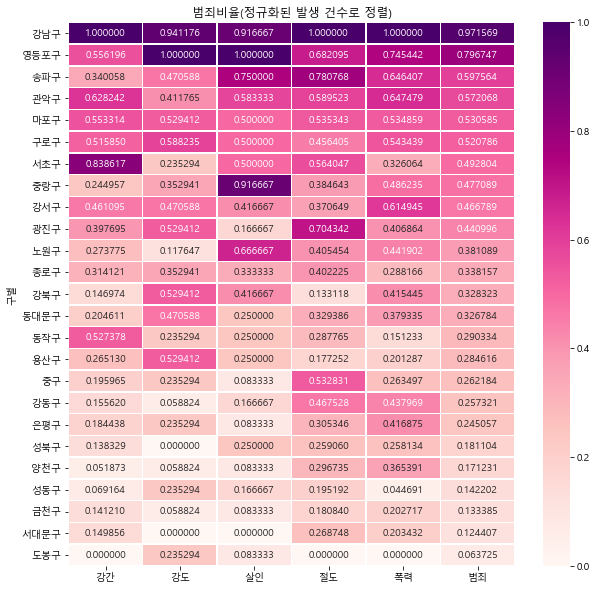

In [65]:
#TODO
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap="RdPu")
plt.title('범죄비율(정규화된 발생 건수로 정렬)')
plt.show() 

In [66]:
#TODO
crime_anal_norm.to_csv('../data/crime_in_Seoul_final.csv', sep=',', encoding='utf-8') 

In [67]:
import folium

# 범죄율에 대한 지도 시각화

In [68]:
import json
geo_path = '../data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [69]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\Users\student\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [70]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['강간'],
               columns = [crime_anal_norm.index, crime_anal_norm['강간']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\Users\student\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [71]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\Users\student\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [72]:
tmp_criminal = crime_anal_norm['살인'] /  crime_anal_norm['인구수'] * 1000000

#TODO
map = folium.Map(location=[37.5502, 126.982], tiles="stamen toner", zoom_start=11)
map.choropleth( geo_data = geo_str, 
               data=tmp_criminal, 
               columns = [crime_anal.index, tmp_criminal],
              fill_color = "PuRd",
              key_on="feature.id") 

map

C:\Users\student\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [73]:
tmp_criminal = crime_anal_norm['범죄'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\Users\student\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [74]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['검거'],
               columns = [crime_anal_norm.index, crime_anal_norm['검거']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\Users\student\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# 경찰서별 검거현황과 구별 범죄발생 현황을 표현하기

In [79]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()
    
crime_anal_raw['검거'] = np.sum(tmp, axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [81]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
     #TODO
    folium.Marker([ crime_anal_raw['lat'][n] , crime_anal_raw['lng'][n]]).add_to(map) 
    
map

In [82]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
   #TODO
    folium.CircleMarker([ crime_anal_raw['lat'][n] , crime_anal_raw['lng'][n]],
                       radius=crime_anal_raw['검거'][n] * 10,
                       color="#3186cc", fill_color="#3186cc", fill=True).add_to(map) 
    
map

In [83]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

C:\Users\student\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
